In [5]:
import pandas as pd

df = pd.read_excel('data.xlsx')
df.columns = ['id', 'release_date', 'shutdown_date', 'shutdown_life', 'avg_lifetime']
print(df)

        id release_date shutdown_date  shutdown_life  avg_lifetime
0      641   2013-10-16    2014-05-16       6.965092      6.965092
1      624   2015-12-16    2016-11-21      11.203285      9.084189
2      459   2014-07-19    2015-09-20      14.061602     10.743326
3     2301   2018-06-28    2019-10-02      15.164474     11.848613
4      613   2014-09-02    2016-02-16      17.478439     12.974579
...    ...          ...           ...            ...           ...
1550  2392   2016-10-07           NaT            NaN           NaN
1551  2393   2016-12-13           NaT            NaN           NaN
1552  2395   2018-04-15           NaT            NaN           NaN
1553  2396   2018-06-29           NaT            NaN           NaN
1554  2398   2018-05-06           NaT            NaN           NaN

[1555 rows x 5 columns]


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1555 entries, 0 to 1554
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             1555 non-null   int64         
 1   release_date   1555 non-null   datetime64[ns]
 2   shutdown_date  172 non-null    datetime64[ns]
 3   shutdown_life  172 non-null    float64       
 4   avg_lifetime   172 non-null    float64       
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 60.9 KB


In [13]:
df.dropna(inplace=True)

       id release_date shutdown_date  shutdown_life  avg_lifetime
0     641   2013-10-16    2014-05-16       6.965092      6.965092
1     624   2015-12-16    2016-11-21      11.203285      9.084189
2     459   2014-07-19    2015-09-20      14.061602     10.743326
3    2301   2018-06-28    2019-10-02      15.164474     11.848613
4     613   2014-09-02    2016-02-16      17.478439     12.974579
..    ...          ...           ...            ...           ...
167   660   2014-07-30    2019-08-22      60.822368     37.911042
168   619   2014-06-03    2019-07-12      61.273101     38.049279
169   630   2013-10-22    2019-02-01      63.342916     38.198065
170   538   2014-06-01    2019-10-01      64.078947     38.349415
171   629   2013-11-11    2019-04-18      65.230000     38.505698

[172 rows x 5 columns]


In [3]:
df['days'] = (df['shutdown_date'] - df['release_date']).dt.days
print(df)

        id release_date shutdown_date  shutdown_life  avg_lifetime   days
0      641   2013-10-16    2014-05-16       6.965092      6.965092  212.0
1      624   2015-12-16    2016-11-21      11.203285      9.084189  341.0
2      459   2014-07-19    2015-09-20      14.061602     10.743326  428.0
3     2301   2018-06-28    2019-10-02      15.164474     11.848613  461.0
4      613   2014-09-02    2016-02-16      17.478439     12.974579  532.0
...    ...          ...           ...            ...           ...    ...
1550  2392   2016-10-07           NaT            NaN           NaN    NaN
1551  2393   2016-12-13           NaT            NaN           NaN    NaN
1552  2395   2018-04-15           NaT            NaN           NaN    NaN
1553  2396   2018-06-29           NaT            NaN           NaN    NaN
1554  2398   2018-05-06           NaT            NaN           NaN    NaN

[1555 rows x 6 columns]


<Axes: ylabel='Frequency'>

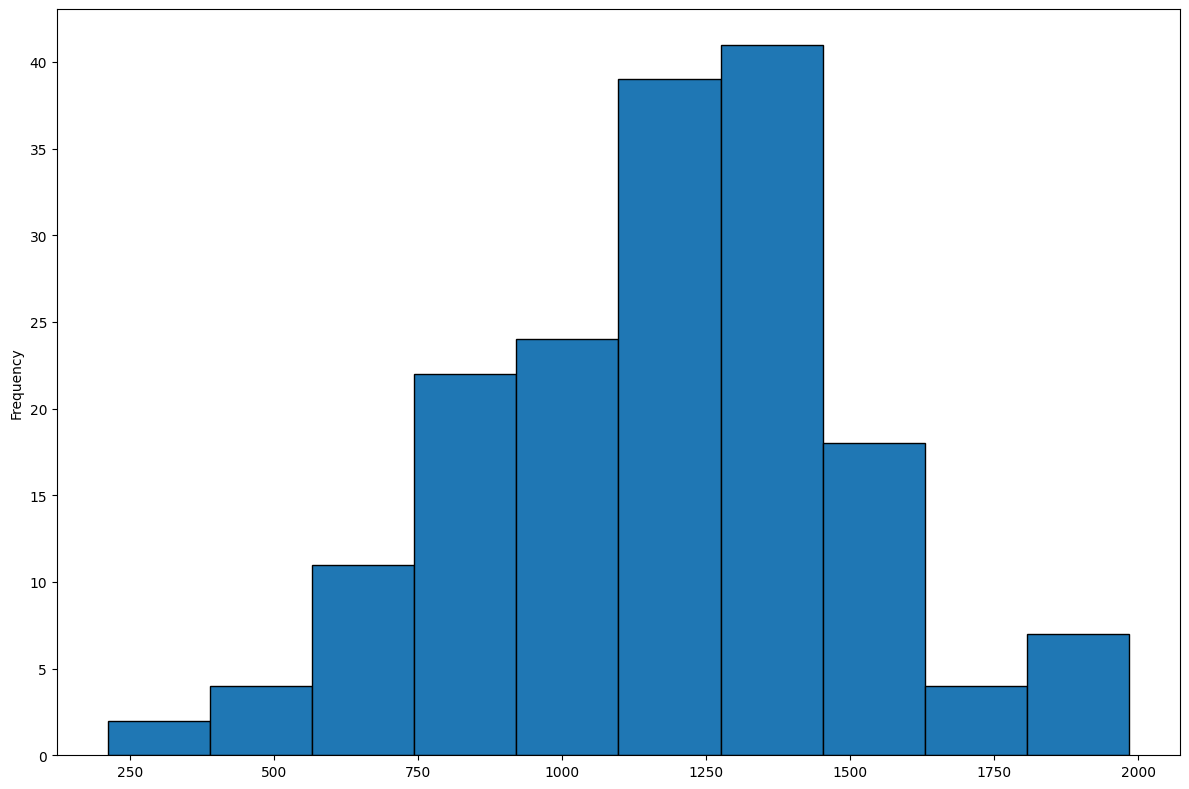

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

df['days'].plot.hist(edgecolor='black')

<Axes: xlabel='shutdown_life', ylabel='Density'>

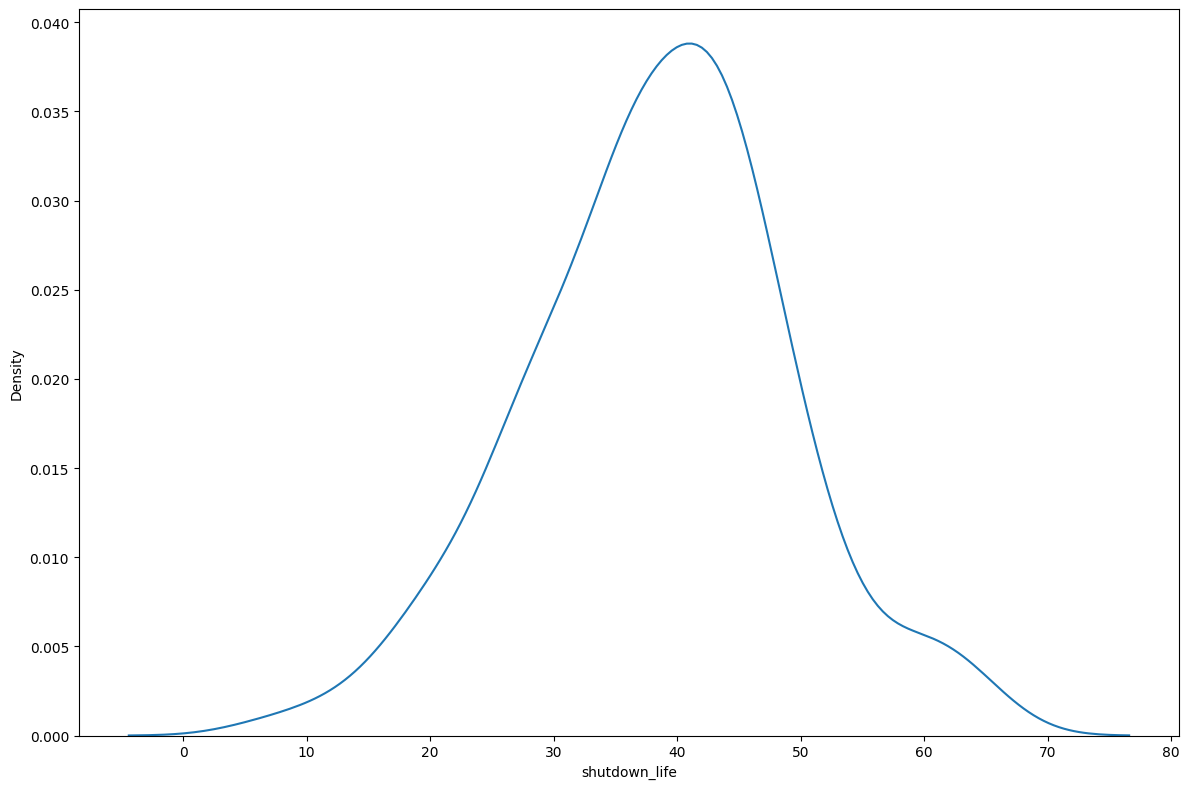

In [40]:
# df['shutdown_life'].plot.kde()
sns.kdeplot(df['shutdown_life'])

Results from Fit_Weibull_2P (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 172/0 (0% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
    Alpha          1285.6         25.7807   1236.05   1337.14
     Beta         4.00162        0.234624    3.5672   4.48894 

Goodness of fit    Value
 Log-likelihood -1238.82
           AICc  2481.71
            BIC  2487.93
             AD 0.704889 



array([1.00000000e+00, 9.99900000e-01, 9.99864539e-01, 9.99820390e-01,
       9.99766239e-01, 9.99700680e-01, 9.99622213e-01, 9.99529248e-01,
       9.99420101e-01, 9.99293000e-01, 9.99146078e-01, 9.98977382e-01,
       9.98784863e-01, 9.98566388e-01, 9.98319732e-01, 9.98042582e-01,
       9.97732538e-01, 9.97387113e-01, 9.97003734e-01, 9.96579744e-01,
       9.96112404e-01, 9.95598890e-01, 9.95036300e-01, 9.94421653e-01,
       9.93751890e-01, 9.93023878e-01, 9.92234409e-01, 9.91380208e-01,
       9.90457928e-01, 9.89464160e-01, 9.88395430e-01, 9.87248205e-01,
       9.86018897e-01, 9.84703865e-01, 9.83299419e-01, 9.81801824e-01,
       9.80207306e-01, 9.78512053e-01, 9.76712225e-01, 9.74803953e-01,
       9.72783349e-01, 9.70646510e-01, 9.68389524e-01, 9.66008477e-01,
       9.63499458e-01, 9.60858565e-01, 9.58081917e-01, 9.55165656e-01,
       9.52105957e-01, 9.48899037e-01, 9.45541160e-01, 9.42028648e-01,
       9.38357891e-01, 9.34525353e-01, 9.30527583e-01, 9.26361224e-01,
      

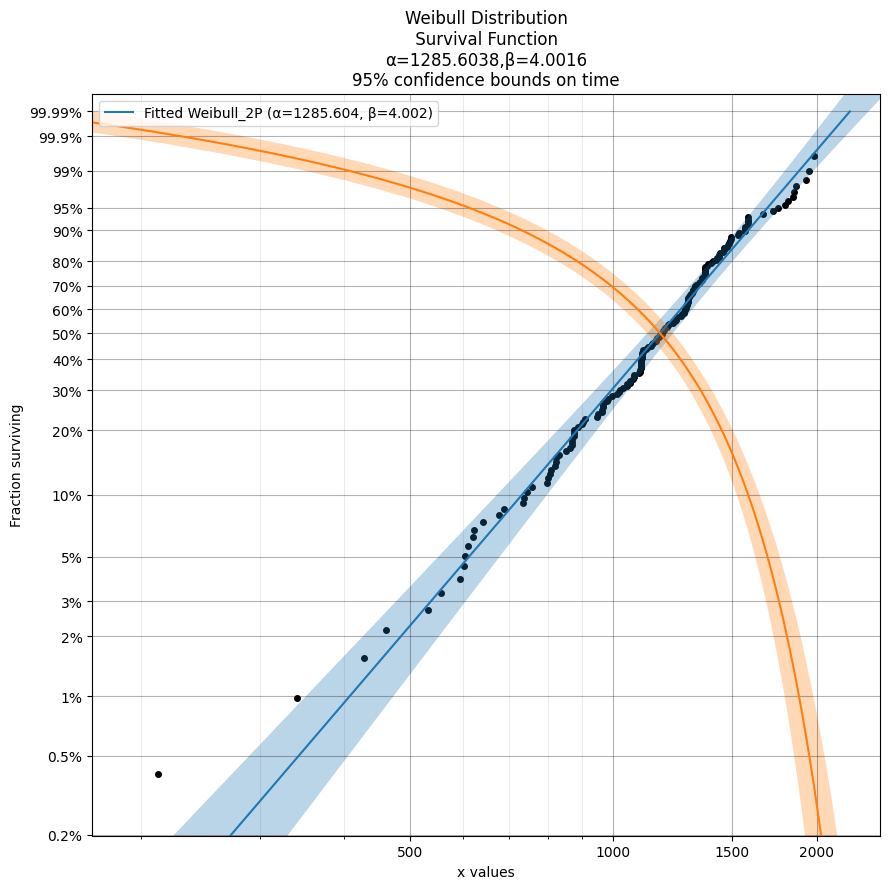

In [42]:
from reliability.Fitters import Fit_Weibull_2P
import numpy as np

fit = Fit_Weibull_2P(failures=np.array(df['days']))
fit.distribution.SF()

array([1.00000000e+00, 9.99900000e-01, 9.99864539e-01, 9.99820390e-01,
       9.99766239e-01, 9.99700680e-01, 9.99622213e-01, 9.99529248e-01,
       9.99420101e-01, 9.99293000e-01, 9.99146079e-01, 9.98977382e-01,
       9.98784864e-01, 9.98566389e-01, 9.98319733e-01, 9.98042583e-01,
       9.97732539e-01, 9.97387114e-01, 9.97003736e-01, 9.96579746e-01,
       9.96112406e-01, 9.95598893e-01, 9.95036303e-01, 9.94421657e-01,
       9.93751894e-01, 9.93023882e-01, 9.92234414e-01, 9.91380213e-01,
       9.90457934e-01, 9.89464166e-01, 9.88395437e-01, 9.87248212e-01,
       9.86018905e-01, 9.84703874e-01, 9.83299429e-01, 9.81801835e-01,
       9.80207317e-01, 9.78512066e-01, 9.76712238e-01, 9.74803967e-01,
       9.72783364e-01, 9.70646526e-01, 9.68389542e-01, 9.66008496e-01,
       9.63499477e-01, 9.60858586e-01, 9.58081939e-01, 9.55165680e-01,
       9.52105982e-01, 9.48899063e-01, 9.45541187e-01, 9.42028677e-01,
       9.38357922e-01, 9.34525385e-01, 9.30527617e-01, 9.26361259e-01,
      

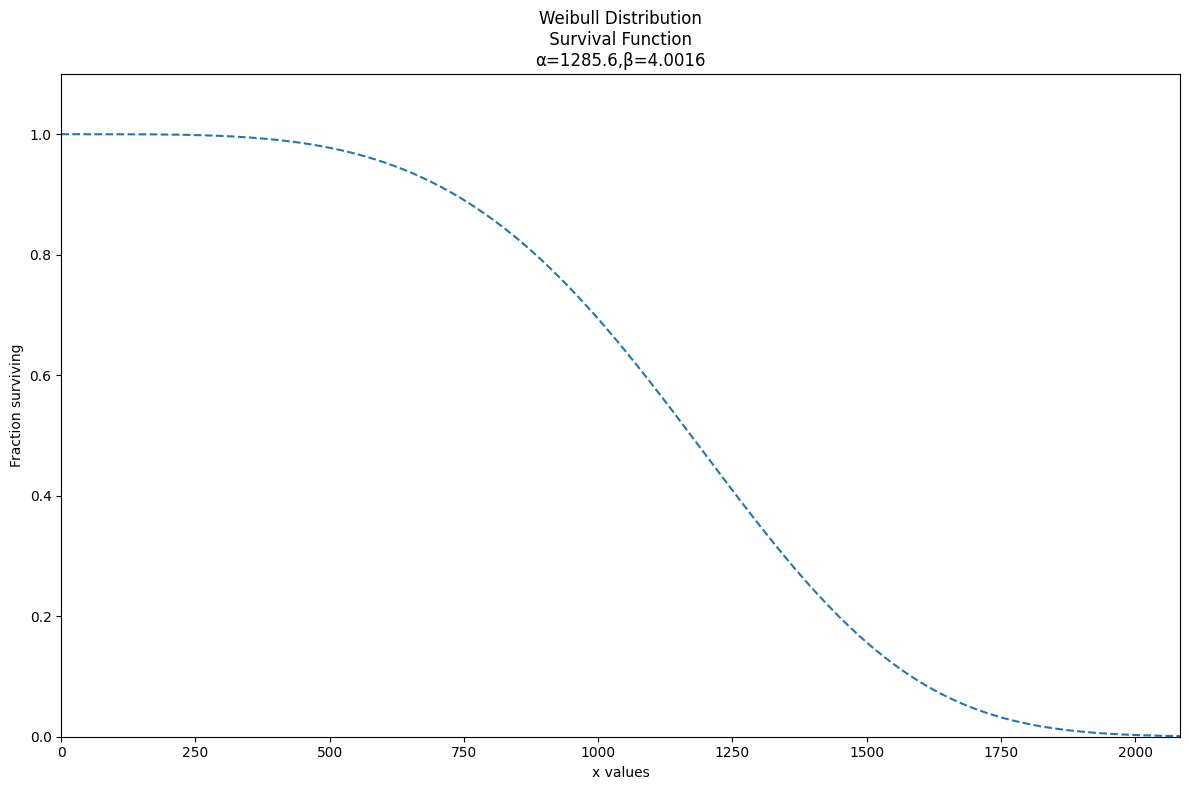

In [43]:
from reliability.Distributions import Weibull_Distribution
dist = Weibull_Distribution(alpha=1285.6, beta=4.00162)
dist.SF()

### Save to CSV

In [6]:
df.to_csv('data.csv')